<a href="https://www.kaggle.com/code/damlasogut/flo-rfm-analysis?scriptVersionId=170484356" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Customer Segmentation with RFM

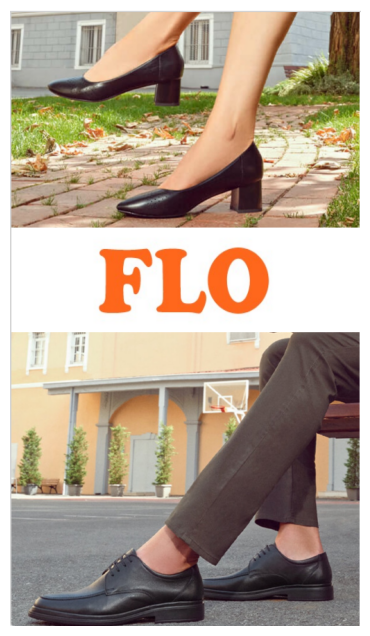

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime as dt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width',1000)
img = mpimg.imread('/kaggle/input/customer-segmentation-with-rfm/FLO.PNG')
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img, extent=[0,1, 0, 1], aspect='auto')
ax.axis('off')
plt.imshow(img)
plt.show()

In [3]:
#Business Problem
#FLO wants to segment its customers and determine marketing strategies according to these segments.
#For this purpose, customers' behaviours will be defined and groups will be formed according
#to these behavioural clusters.

In [4]:
#Step 1.
df_= pd.read_csv('/kaggle/input/customer-segmentation-with-rfm/flo_data_20k.csv')
df=df_.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [5]:
#Step 2.
#In the data set a. First 10 observations, b. Variable names, c. Descriptive statistics, d. Null value, e. Variable types, examine.
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [6]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline', 'order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online', 'interested_in_categories_12'], dtype='object')

In [7]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [8]:
df.isnull().sum()  

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [9]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [10]:
##Step 3.
#Create new variables for the total number of purchases and expenditure of each customer.(online+offline)
df["total_order_number"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_number,customer_value_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


In [11]:
##Step 4.
#Examine the variable types. Change the type of variables that express date to date.

date_variable_list = ["first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline"]
for variable in date_variable_list:
    df[variable] = pd.to_datetime(df[variable])
    df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  object        
 5   last_order_date_online             19945 non-null  object        
 6   last_order_date_offline            19945 non-null  object        
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [12]:
#Step 5.
#See the distribution of the number of customers in shopping channels, total number of products purchased and total expenditure.
df.groupby("order_channel").agg({"master_id": "count",
                                "total_order_number": "sum",
                                "customer_value_total": "sum"})


,master_id,total_order_number,customer_value_total
order_channel,,,
Android App,9495,52269.0,7819062.76
Desktop,2735,10920.0,1610321.46
Ios App,2833,15351.0,2525999.93
Mobile,4882,21679.0,3028183.16


In [13]:
#Step 6.
#List the top 10 most profitable customers.
df.groupby("master_id").agg({"customer_value_total": "sum"}).sort_values(by="customer_value_total", ascending = False).head(10)

,customer_value_total
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24


In [14]:
#Step 7.
#List the top 10 customers who placed the most orders.
df.groupby("master_id").agg({"total_order_number": "sum"}).sort_values(by= "total_order_number", ascending=False).head(10)

,total_order_number
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0
73fd19aa-9e37-11e9-9897-000d3a38a36f,82.0
44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.0
b27e241a-a901-11e9-a2fc-000d3a38a36f,75.0
d696c654-2633-11ea-8e1c-000d3a38a36f,70.0


In [15]:
#Step 8.
#Functionalise the data preparation process.
def preliminary(dataframe):
    dataframe["total_order_number"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]
    dataframe["customer_value_total"] = dataframe["customer_value_total_ever_offline"] + dataframe["customer_value_total_ever_online"]

    date_variable_list = ["first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline"]
    for variable in date_variable_list:
        dataframe[variable] = pd.to_datetime(df[variable])
    return dataframe

preliminary(df)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_number,customer_value_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]",3.0,401.96
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR],2.0,390.47
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR],3.0,632.94
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]",6.0,1009.77


In [16]:
# Calculation of RFM Metrics

In [17]:
#Step 1.
#Define Recency, Frequency and Monetary.
df["last_order_date"].max()   # 2021-05-30
today_date = dt.datetime(2021,6,1)

In [18]:
rfm = df.groupby('master_id').agg({"last_order_date":lambda last_order_date : (today_date -  last_order_date.max()).days,
                                       "total_order_number": lambda x:x,
                                     'customer_value_total': lambda x:x})
rfm.reset_index(inplace=True) 

In [19]:
#Step 2.
#Change the names of the metrics you created as recency, frequency and monetary.
rfm.columns = ['customer_id','recency', 'frequency', 'monetary']
rfm.head()

,customer_id,recency,frequency,monetary
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33


In [20]:
#Calculation of RF and RFM Scores

In [21]:
#Convert Recency, Frequency and Monetary metrics into scores between 1-5 with the help of qcut.
#Save these scores as recency_score, frequency_score and monetary_score.
rfm["recency_score"] = pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"],5,labels=[1,2,3,4,5])

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,2,1
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,3,4
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,4,5


In [22]:
#Express recency_score and frequency_score as a single variable and save as RF_SCORE
rfm["RF_SCORE"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)
rfm.head()


,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4,54
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,2,1,12
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,3,4,23
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4,54
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,4,5,54


In [23]:
#Segmental Identification of RF Scores

In [24]:
#Make segment definitions for the RF scores created.Convert the scores into segments with the help of seg_map below.
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}


In [25]:
rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4,54,champions
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,2,1,12,hibernating
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,3,4,23,at_Risk
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4,54,champions
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,4,5,54,champions


In [26]:
#Analyse the recency, frequnecy and monetary averages of the segments.
rfm.groupby("segment").agg({"recency": "mean",
                            "frequency": "mean",
                            "monetary": "mean"})

,recency,frequency,monetary
segment,,,
about_to_sleep,114.031649,2.406573,361.649373
at_Risk,242.328997,4.470178,648.325038
cant_loose,235.159129,10.716918,1481.652446
champions,17.142187,8.965104,1410.708938
hibernating,247.426303,2.391474,362.583299
loyal_customers,82.557926,8.356444,1216.257224
need_attention,113.037221,3.739454,553.436638
new_customers,17.976226,2.000000,344.049495
potential_loyalists,36.869744,3.310769,533.741344
